In [1]:
# import modules:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the json data into pandas dataframe:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
type(df.login_time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# add a column for login count:
df['login_count'] = pd.Series([1 for x in range(len(df.index))], index=df.index)

In [5]:
df.sort_values(by='login_time', ascending=False)
df = df.set_index('login_time')
df.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


# Login counts aggregated by 15 minute time intervals

In [6]:
# group into 15min intervals at the hald hour marks:
intervals = df.groupby(pd.Grouper(freq='15Min', base=30, label='right'))['login_count'].sum()
intervals.head()

login_time
1970-01-01 20:15:00    2
1970-01-01 20:30:00    6
1970-01-01 20:45:00    9
1970-01-01 21:00:00    7
1970-01-01 21:15:00    1
Freq: 15T, Name: login_count, dtype: int64

In [7]:
# check the missing data:
min_date = intervals.index.min(axis=0)
max_date = intervals.index.max(axis=0)
pd.date_range(start = min_date, end = max_date ).difference(intervals.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

# Overall Trends

In [8]:
print('min date:',min_date,'\nmax date:', max_date)

min date: 1970-01-01 20:15:00 
max date: 1970-04-13 19:00:00


In [34]:
dataframe=intervals.reset_index(name='login_count')
dataframe=dataframe.sort_values(by='login_time')
dataframe['Date']=dataframe.login_time.apply(lambda x: x.date())
dataframe['Month']=dataframe.login_time.apply(lambda x: x.month)
dataframe['Time']=dataframe.login_time.apply(lambda x: x.time())
dataframe['Hour']=dataframe.login_time.apply(lambda x: x.strftime("%H"))
dataframe['weekday']=dataframe.login_time.apply(lambda x: x.strftime("%A"))
dataframe.head()

,login_time,login_count,Date,Month,Time,Hour,weekday
0,1970-01-01 20:15:00,2,1970-01-01,1,20:15:00,20,Thursday
1,1970-01-01 20:30:00,6,1970-01-01,1,20:30:00,20,Thursday
2,1970-01-01 20:45:00,9,1970-01-01,1,20:45:00,20,Thursday
3,1970-01-01 21:00:00,7,1970-01-01,1,21:00:00,21,Thursday
4,1970-01-01 21:15:00,1,1970-01-01,1,21:15:00,21,Thursday


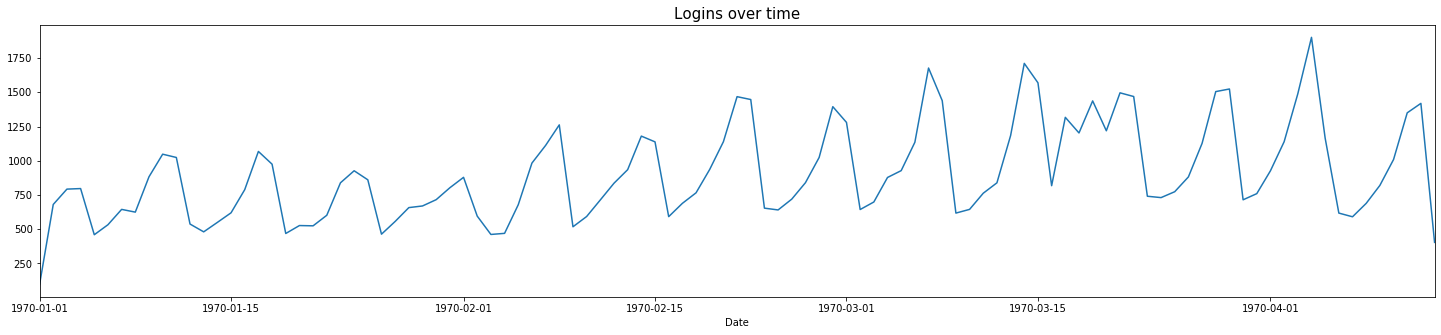

In [10]:
_ = dataframe.groupby('Date')['login_count'].sum().plot(figsize=(25,5))
_ = plt.title('Logins over time', fontsize=15)

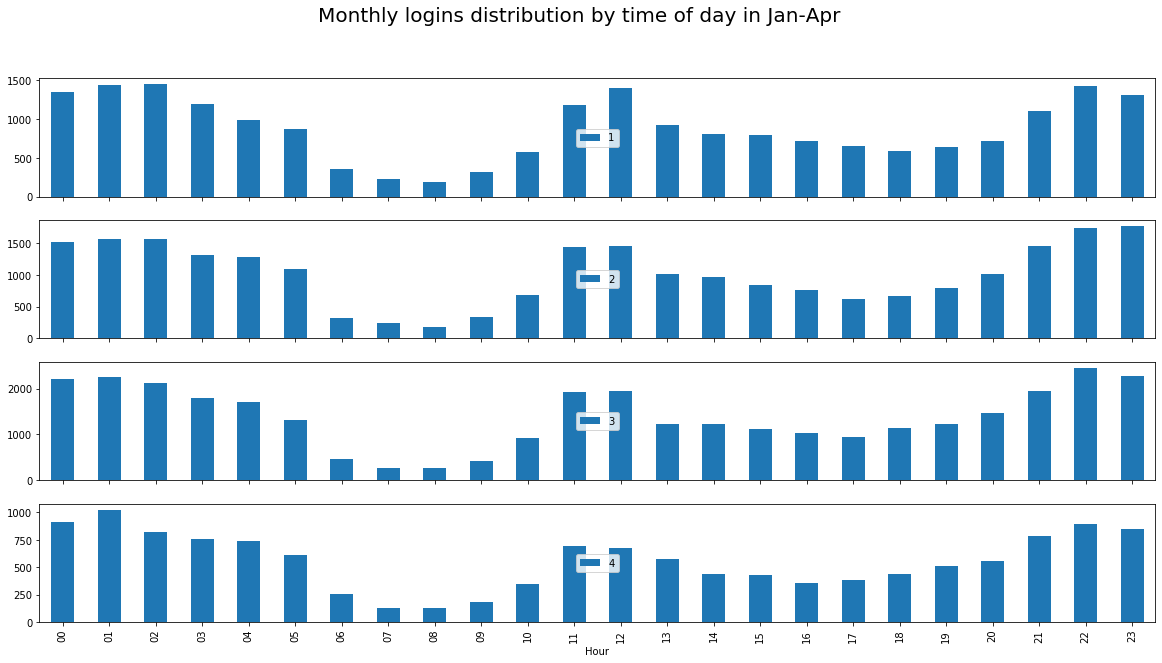

In [49]:
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(20, 10),sharex=True)
_ = plt.suptitle('Monthly logins distribution by time of day in Jan-Apr', fontsize=20)

_ = dataframe[dataframe.Month==1].groupby('Hour')['login_count'].sum().plot(kind='bar',ax=axes[0])
_ = axes[0].legend('1',loc='center')
_ = dataframe[dataframe.Month==2].groupby('Hour')['login_count'].sum().plot(kind='bar',ax=axes[1])
_ = axes[1].legend('2',loc='center')
_ = dataframe[dataframe.Month==3].groupby('Hour')['login_count'].sum().plot(kind='bar',ax=axes[2])
_ = axes[2].legend('3',loc='center')
_ = dataframe[dataframe.Month==4].groupby('Hour')['login_count'].sum().plot(kind='bar',ax=axes[3])
_ = axes[3].legend('4',loc='center')

1-3AM, 11-1PM and 10PM are the times with the most logins.

# Missing Values

In [13]:
dataframe.pivot(index="Time", columns="Date", values="login_count")

Date,1970-01-01,1970-01-02,1970-01-03,1970-01-04,1970-01-05,1970-01-06,1970-01-07,1970-01-08,1970-01-09,1970-01-10,...,1970-04-04,1970-04-05,1970-04-06,1970-04-07,1970-04-08,1970-04-09,1970-04-10,1970-04-11,1970-04-12,1970-04-13
Time,,,,,,,,,,,,,,,,,,,,,
00:00:00,NaN,15.0,15.0,15.0,6.0,5.0,8.0,11.0,11.0,9.0,...,29.0,17.0,14.0,11.0,10.0,19.0,17.0,17.0,19.0,9.0
00:15:00,NaN,10.0,5.0,11.0,8.0,7.0,9.0,8.0,23.0,16.0,...,31.0,12.0,6.0,14.0,6.0,18.0,17.0,31.0,17.0,12.0
00:30:00,NaN,18.0,10.0,14.0,3.0,4.0,11.0,16.0,20.0,13.0,...,39.0,22.0,6.0,10.0,12.0,7.0,15.0,27.0,27.0,8.0
00:45:00,NaN,12.0,7.0,15.0,7.0,7.0,5.0,8.0,20.0,15.0,...,53.0,36.0,6.0,16.0,10.0,16.0,21.0,17.0,35.0,8.0
01:00:00,NaN,13.0,17.0,12.0,4.0,7.0,4.0,11.0,10.0,14.0,...,50.0,30.0,8.0,15.0,9.0,12.0,21.0,17.0,24.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,1.0,21.0,19.0,6.0,3.0,11.0,18.0,12.0,14.0,10.0,...,9.0,10.0,14.0,18.0,11.0,19.0,37.0,39.0,11.0,NaN
23:00:00,3.0,17.0,17.0,7.0,10.0,12.0,10.0,21.0,9.0,13.0,...,17.0,6.0,12.0,12.0,20.0,17.0,26.0,22.0,10.0,NaN
23:15:00,16.0,12.0,13.0,2.0,7.0,9.0,19.0,20.0,8.0,8.0,...,15.0,10.0,10.0,8.0,29.0,10.0,25.0,21.0,7.0,NaN


Upon observing the dataframe by time of the day, we can see that there are missing values for some time intervals, for example, for 00:00:00 on 1970-01-01. We decided to replace the missing values with 0 in the future analysis.

# Average Login Counts

In [14]:
data = dataframe.pivot(columns="Time", index="Date", values="login_count").fillna(0)
data['Month']=[data.index[i].month for i in range(0,len(data))]
by_mth_df=data.groupby('Month').mean()
by_mth_df=by_mth_df.T
by_mth_df.head()

Month,1,2,3,4
Time,,,,
00:00:00,10.806452,12.964286,18.161290,16.615385
00:15:00,10.096774,12.892857,17.838710,16.307692
00:30:00,11.645161,14.714286,17.774194,17.153846
00:45:00,10.935484,13.857143,17.322581,20.076923
01:00:00,12.000000,12.392857,16.741935,18.769231


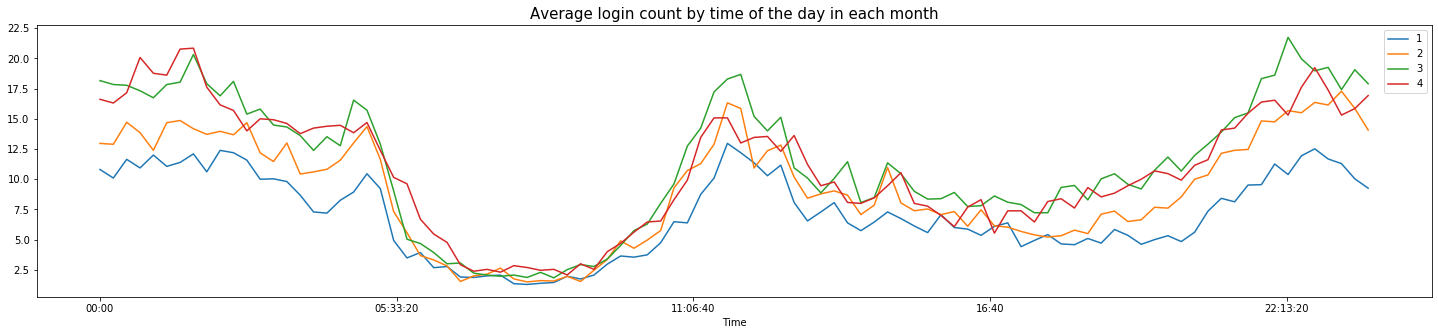

In [50]:
_ = plt.figure(figsize=(25,5))
_ = sns.lineplot(data=by_mth_df,dashes=False, legend='brief')
_ = plt.title('Average login count by time of the day in each month', fontsize=15)

Average login counts pattern stayed the same across the months of Jan to mid April. Login count is max around 2am, 12pm and 10pm. A drop in the average login counts between 5am and 12pm can be problematic if the intended use implied more logins in daytime.

In [16]:
#data.drop(columns=['Month'])
data['weekday']=[data.index[i].strftime("%A") for i in range(0,len(data))]
data.head()
by_weekday_df=data.groupby(['Month','weekday']).mean()
by_weekday_df=by_weekday_df.reset_index()
by_weekday_df['weekday'] = pd.Categorical(by_weekday_df['weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
by_weekday_df.sort_values(by=['Month','weekday'], inplace=True)
by_weekday_df=by_weekday_df.groupby(['Month','weekday']).mean().mean(axis=1).unstack(level=0)
by_weekday_df

Month,1,2,3,4
weekday,,,,
Monday,5.028646,6.145833,7.366667,5.322917
Tuesday,5.463542,6.210938,8.650000,6.156250
Wednesday,6.192708,6.953125,9.421875,8.416667
Thursday,5.445833,8.572917,10.640625,10.203125
Friday,8.141667,10.627604,12.148438,13.010417
Saturday,9.664583,13.424479,16.638021,16.932292
Sunday,9.523438,12.307292,15.168750,13.458333


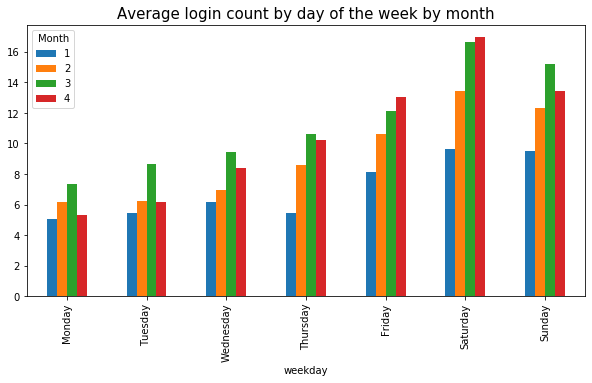

In [17]:
_ = by_weekday_df.plot(kind='bar',figsize=(10,5))
_ = plt.title('Average login count by day of the week by month', fontsize=15)

Saturday is the most popular day. Fri and Sat average login count increased over time, while the average login count in other weekdays dropped between Mar and Apr.